In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [230]:
df = pd.read_csv('car_data.csv')
df.head()

,Weight,Horsepower,Number of cylinders,Mileage
0,3123.620357,54.714378,7,-15.987429
1,4852.142919,145.461562,7,-20.027300
2,4195.981825,97.153397,6,-12.446144
3,3795.975453,126.285604,4,-2.016606
4,2468.055921,186.134971,7,-11.190111


In [231]:
df.isnull().sum()

Weight                 0
Horsepower             0
Number of cylinders    0
Mileage                0
dtype: int64

*Not sure if required

In [232]:
df_copy = df.copy(deep = True) 
df_copy[['Weight','Horsepower','Number of cylinders','Mileage']] = df_copy[['Weight','Horsepower','Number of cylinders','Mileage']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Weight                 0
Horsepower             0
Number of cylinders    0
Mileage                0
dtype: int64


C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Weight'>

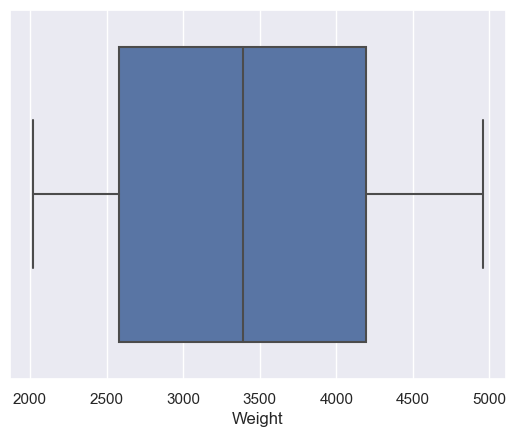

In [233]:
sns.boxplot(x=df["Weight"])

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Horsepower'>

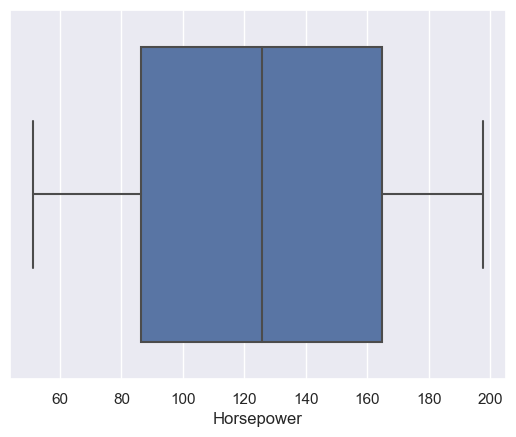

In [234]:
sns.boxplot(x=df["Horsepower"])

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Number of cylinders', ylabel='count'>

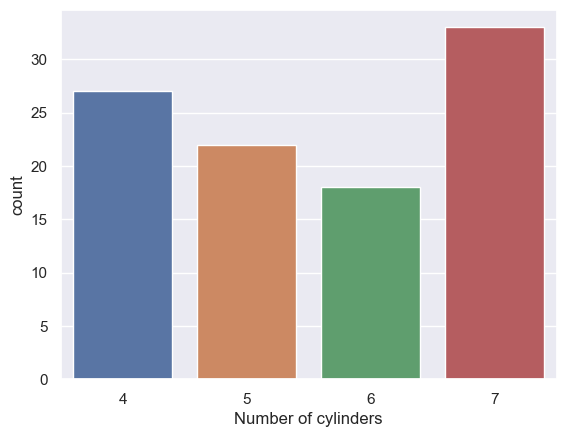

In [235]:
sns.countplot(data=df, x='Number of cylinders')

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Mileage'>

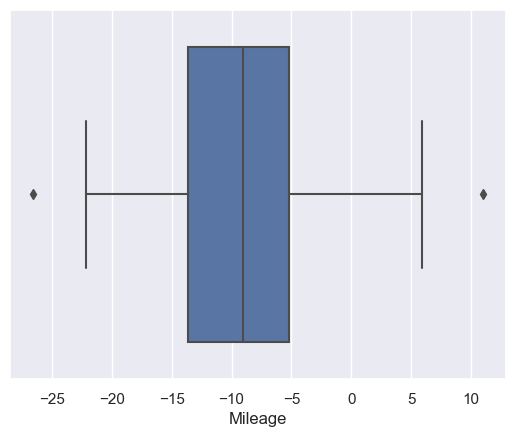

In [236]:
sns.boxplot(x=df["Mileage"])

<Axes: >

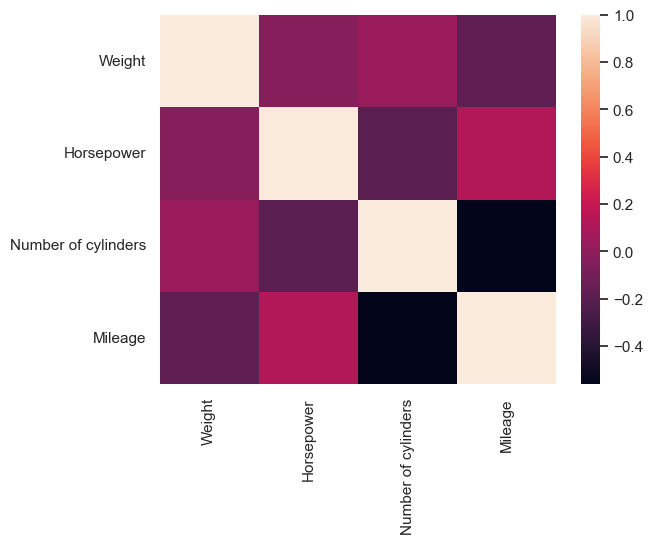

In [237]:
sns.heatmap(df.corr(), fmt='.2g')

**Normalizing**


In [238]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,Weight,Horsepower,Number of cylinders,Mileage
0,-0.321493,-1.591213,1.183599,-1.031539
1,1.615296,0.472785,1.183599,-1.652898
2,0.880076,-0.625959,0.355907,-0.486866
3,0.431873,0.036638,-1.299476,1.117266
4,-1.056045,1.397881,1.183599,-0.293680


In [239]:
X = df_norm.drop('Mileage', axis=1)
y = df_norm['Mileage']

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Implementing Linear Regresion(Using Gradient Descent)**


In [241]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [242]:
# Function to calculate the cost (mean squared error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [243]:
# Function to perform batch gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [244]:
theta = np.zeros(4)
learning_rate = 0.01
iterations = 1000

In [245]:
# Adding bias column
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

In [246]:
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

In [247]:
# Calculate RMSE on training set
predictions_train = hypothesis(X_train, theta_final)
rmse_train = np.sqrt(np.mean(np.square(predictions_train - y_train)))
print("RMSE on training set:", rmse_train)

RMSE on training set: 0.8609909358636338


In [248]:
# Adding bias column
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [249]:
# Calculate RMSE on testing set
predictions_test = hypothesis(X_test, theta_final)
rmse_test = np.sqrt(np.mean(np.square(predictions_test - y_test)))
print("RMSE on testing set:", rmse_test)

RMSE on testing set: 0.5654652566917723


In [250]:
new_data_point = np.array([1, 3000, 150, 6])

In [251]:
mean_weight = df['Weight'].mean()
std_weight = df['Weight'].std()

mean_horsepower = df['Horsepower'].mean()
std_horsepower = df['Horsepower'].std()

mean_cylinders = df['Number of cylinders'].mean()
std_cylinders = df['Number of cylinders'].std()

**Predicting for a New DataPoint**


In [252]:
new_dp = np.array([1, (new_data_point[1] - mean_weight) / std_weight,
                   (new_data_point[2] - mean_horsepower) / std_horsepower,
                   (new_data_point[3] - mean_cylinders) / std_cylinders])

In [253]:
# Optionally for shorthand
new_dp = np.array([1, (3000 - df['Weight'].mean()) / df['Weight'].std(),
                    (150 - df['Horsepower'].mean()) / df['Horsepower'].std(),
                    (6 - df['Number of cylinders'].mean()) / df['Number of cylinders'].std()])

In [254]:
predicted_mileage = hypothesis(new_dp, theta_final)
print("Predicted mileage:", predicted_mileage)

Predicted mileage: -0.06261989474615536


**Plotting**

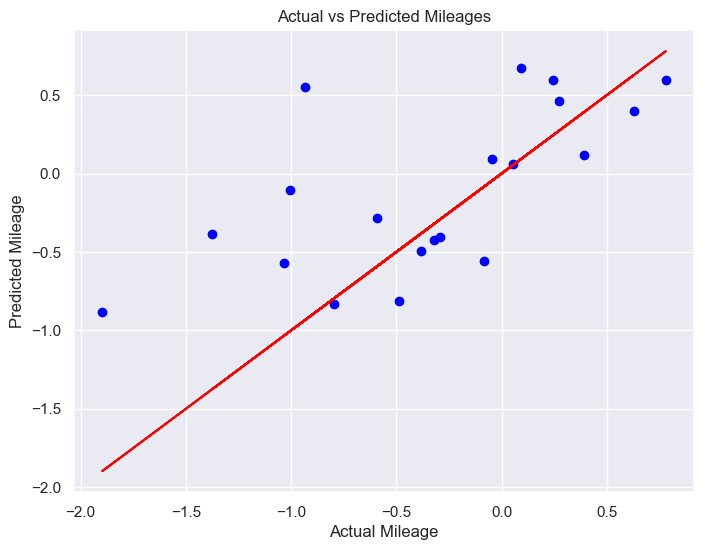

In [255]:
# Plot actual vs predicted mileages for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Mileages')
plt.xlabel('Actual Mileage')
plt.ylabel('Predicted Mileage')
plt.show()

In [256]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(99, 4)

In [257]:
df_norm = (data_clean - data_clean.mean()) / data_clean.std()
df_norm.head()

,Weight,Horsepower,Number of cylinders,Mileage
0,-0.333143,-1.584495,1.174199,-1.048435
1,1.606103,0.488671,1.174199,-1.699886
2,0.869949,-0.614954,0.349761,-0.477383
3,0.421179,0.050586,-1.299114,1.204436
4,-1.068627,1.417876,1.174199,-0.274841


In [258]:
from sklearn.model_selection import train_test_split

X = df_norm.drop('Mileage', axis=1)
y = df_norm['Mileage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [260]:
theta = np.zeros(4)
learning_rate = 0.01
iterations = 1000

In [261]:
# Adding bias column
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

In [262]:
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

In [263]:
# Calculate RMSE on training set
predictions_train = hypothesis(X_train, theta_final)
rmse_train = np.sqrt(np.mean(np.square(predictions_train - y_train)))
print("RMSE on training set:", rmse_train)

RMSE on training set: 0.739433654273032


In [264]:
# Adding bias column
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [265]:
# Calculate RMSE on testing set
predictions_test = hypothesis(X_test, theta_final)
rmse_test = np.sqrt(np.mean(np.square(predictions_test - y_test)))
print("RMSE on testing set:", rmse_test)

RMSE on testing set: 1.023892195902395


In [266]:
new_data_point = np.array([1, 3000, 150, 6])

new_dp = np.array([1, (3000 - df['Weight'].mean()) / df['Weight'].std(),
                    (150 - df['Horsepower'].mean()) / df['Horsepower'].std(),
                    (6 - df['Number of cylinders'].mean()) / df['Number of cylinders'].std()])

In [267]:
predicted_mileage = hypothesis(new_dp, theta_final)
print("Predicted mileage:", predicted_mileage)

Predicted mileage: -0.24454341947943034


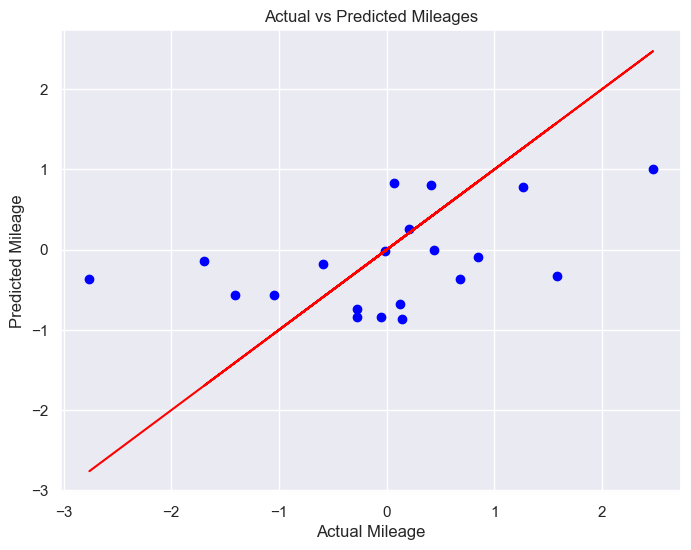

In [268]:
# Plot actual vs predicted mileages for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Mileages')
plt.xlabel('Actual Mileage')
plt.ylabel('Predicted Mileage')
plt.show()